## 1000 PUNTOS EN LA MALLA

In [8]:
! gfortran osciladorCuantico.f90 diagotri.f90 -o osciladorCuantico

In [9]:
!./osciladorCuantico

 los 6 primeros autovalores:
  50   0.494948   1.474526   2.433112   3.369958   4.284221   5.174939
 100   0.498747   1.493722   2.483639   3.468459   4.448141   5.422645
 200   0.499687   1.498436   2.495931   3.492170   4.487150   5.480870
 400   0.499922   1.499609   2.498984   3.498046   4.496795   5.495230
 800   0.499980   1.499902   2.499746   3.499512   4.499199   5.498808

 Autovectores en data_oscilador


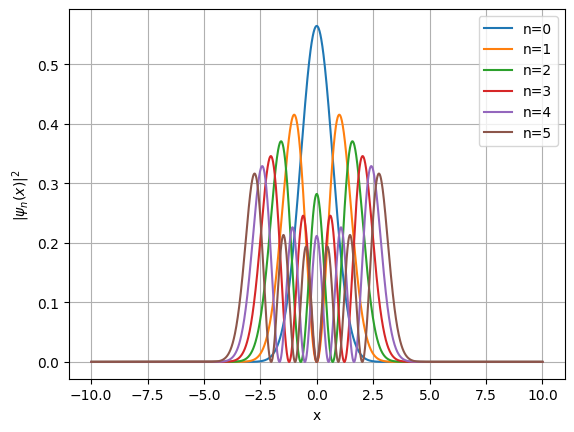

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data_oscilador")

x = data[:,0]

for i in range(1,7):
    plt.plot(x, data[:,i], label=f"n={i-1}")

plt.xlabel("x")
plt.ylabel(r"$|\psi_n(x)|^2$")
plt.legend()
plt.grid()
plt.show()

In [4]:
import ipywidgets as widgets
print("ipywidgets imported successfully.")

ipywidgets imported successfully.


In [5]:
def plot_eigenvector(n):
    plt.clf()
    plt.plot(x, data[:, n + 1])
    plt.xlabel('x')
    plt.ylabel(r'$|\psi_n(x)|^2$')
    plt.title(f'Eigenvector for n = {n}')
    plt.grid()
    plt.show()

print("plot_eigenvector function defined successfully.")

plot_eigenvector function defined successfully.


In [ ]:
n_slider = widgets.IntSlider(min=0, max=5, step=1, value=0, description='Eigenvector n')

widgets.interact(plot_eigenvector, n=n_slider)

print("Interactive slider created and linked successfully.")

interactive(children=(IntSlider(value=0, description='Eigenvector n', max=5), Output()), _dom_classes=('widget…

Interactive slider created and linked successfully.


## 2000 PUNTOS EN LA MALLA

In [21]:
! gfortran osciladorCuantico1.f90 diagotri.f90 -o osciladorCuantico1

In [22]:
!./osciladorCuantico1

 los primeros autovalores:
  50   0.494948   1.474526   2.433112   3.369958   4.284221   5.174939
 100   0.498747   1.493722   2.483639   3.468459   4.448141   5.422645
 200   0.499687   1.498436   2.495931   3.492170   4.487150   5.480870
 400   0.499922   1.499609   2.498984   3.498046   4.496795   5.495230
 800   0.499980   1.499902   2.499746   3.499512   4.499199   5.498808
1600   0.499995   1.499976   2.499937   3.499878   4.499800   5.499702

 Autovectores en data_oscilador1


## 3500 PUNTOS EN LA MALLA

In [23]:
! gfortran osciladorCuantico2.f90 diagotri.f90 -o osciladorCuantico2

In [24]:
!./osciladorCuantico2

 los 6 primeros autovalores:
2000   0.499997   1.499984   2.499959   3.499922   4.499872   5.499809

 Autovectores en data_oscilador2


## 4500 PUNTOS EN LA MALLA

In [25]:
! gfortran osciladorCuantico3.f90 diagotri.f90 -o osciladorCuantico3

In [26]:
!./osciladorCuantico3

 los primeros autovalores:
2000   0.499997   1.499984   2.499959   3.499922   4.499872   5.499809
4000   0.499999   1.499996   2.499990   3.499980   4.499968   5.499952

 Autovectores en data_oscilador3


In [33]:
! gfortran osciladorCuantico4.f90 diagotri.f90 -o osciladorCuantico4

In [ ]:
!./osciladorCuantico4

 los primeros autovalores:
  80   0.498039   1.490164   2.474335   3.450451   4.418409   5.378102
 160   0.499511   1.497554   2.493636   3.487749   4.479889   5.470050
 320   0.499878   1.499389   2.498412   3.496946   4.494989   5.492544
 640   0.499969   1.499847   2.499603   3.499237   4.498748   5.498138
1280   0.499992   1.499962   2.499901   3.499809   4.499687   5.499535
2560   0.499998   1.499990   2.499975   3.499952   4.499922   5.499884
5120   0.500000   1.499998   2.499994   3.499988   4.499980   5.499971


Puntos de malla: 800
Energías: [0.499995 1.499976 2.499937 3.499878 4.4998   5.499702]


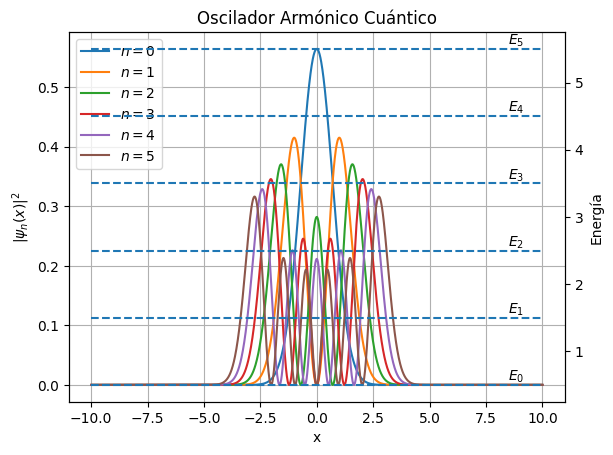

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Leer primera línea manualmente ---
with open("data_oscilador", "r") as f:
    first_line = f.readline()

values = first_line.split()

N_points = int(values[1])          # 800
energies = np.array(values[2:], dtype=float)  # energías reales

print("Puntos de malla:", N_points)
print("Energías:", energies)

# --- Leer datos ignorando la línea que empieza por # ---
data = np.loadtxt("data_oscilador")

x = data[:, 0]

# Crear figura
fig, ax1 = plt.subplots()

# -------- Funciones de onda (densidades) ----------
for i in range(1, 7):
    ax1.plot(x, data[:, i], label=f"$n={i-1}$")

ax1.set_xlabel("x")
ax1.set_ylabel(r"$|\psi_n(x)|^2$")
ax1.grid()

# -------- Energías (segundo eje) ----------
ax2 = ax1.twinx()

for n, E in enumerate(energies):
    ax2.hlines(E, xmin=x.min(), xmax=x.max(),
               linestyles="dashed")
    
    # Etiqueta sobre la línea
    ax2.text(x.max()*0.85, E,
             rf"$E_{n}$",
             verticalalignment='bottom')

ax2.set_ylabel("Energía")

ax1.legend(loc="upper left")
plt.title("Oscilador Armónico Cuántico")

plt.show()

In [28]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# -------- Leer archivo --------
with open("data_oscilador", "r") as f:
    first_line = f.readline()

values = first_line.split()
energies = np.array(values[2:], dtype=float)

data = np.loadtxt("data_oscilador")
x = data[:, 0]

# -------- Función interactiva --------
def plot_eigenvector(n):
    
    fig, ax1 = plt.subplots()
    
    # Densidad
    ax1.plot(x, data[:, n+1])
    ax1.set_xlabel('x')
    ax1.set_ylabel(r'$|\psi_n(x)|^2$')
    ax1.grid()
    
    # Energía
    ax2 = ax1.twinx()
    E = energies[n]
    
    ax2.hlines(E, xmin=x.min(), xmax=x.max(),
               linestyles="dashed")
    
    ax2.text(x.max()*0.85, E,
             rf"$E_{n}={E:.3f}$",
             verticalalignment='bottom')
    
    ax2.set_ylabel("Energía")
    
    plt.title(f"Oscilador Armónico Cuántico — n = {n}")
    plt.show()

# -------- Slider --------
interact(plot_eigenvector, n=(0, len(energies)-1));

interactive(children=(IntSlider(value=2, description='n', max=5), Output()), _dom_classes=('widget-interact',)…

## Potencial |x|

In [2]:
! gfortran PotencialAbs.f90 diagotri.f90 -o potencialAbs

In [3]:
!./potencialAbs

 Calculando los 6 primeros autovalores para V(x) = |x|:
    N      E0        E1        E2        E3        E4        E5
 ------------------------------------------------------------
  50   0.783973   1.837346   2.533805   3.186242   3.737415   4.272857


 100   0.802715   1.851160   2.567535   3.230436   3.804823   4.355701
 200   0.807157   1.854609   2.575484   3.241090   3.820555   4.375249
 400   0.808253   1.855470   2.577445   3.243730   3.824429   4.380070
 800   0.808526   1.855685   2.577933   3.244388   3.825394   4.381271
1600   0.808594   1.855739   2.578055   3.244553   3.825635   4.381571
 ------------------------------------------------------------
 Proceso finalizado. Autovectores en: data_Abs


Puntos de malla: 800
Energías: [0.509387 1.169047 1.624083 2.043953 2.410018 2.760241]


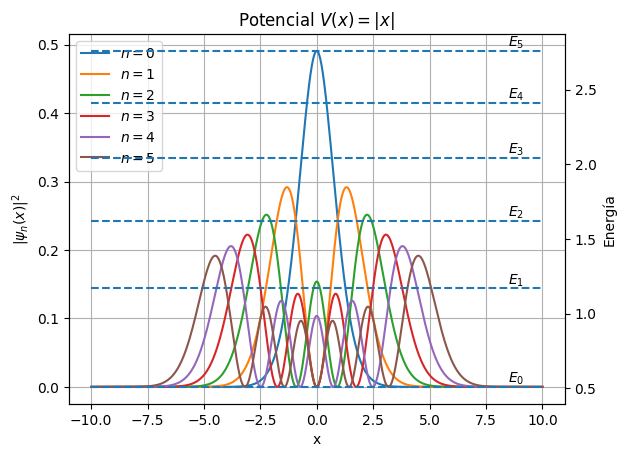

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- Leer primera línea manualmente ---
with open("data_Abs", "r") as f:
    first_line = f.readline()

values = first_line.split()

N_points = int(values[1])
energies = np.array(values[2:], dtype=float)

print("Puntos de malla:", N_points)
print("Energías:", energies)

# --- Leer datos ---
data = np.loadtxt("data_Abs")

x = data[:, 0]

# Crear figura
fig, ax1 = plt.subplots()

# -------- Funciones de onda ----------
for i in range(1, 7):
    ax1.plot(x, data[:, i], label=f"$n={i-1}$")

ax1.set_xlabel("x")
ax1.set_ylabel(r"$|\psi_n(x)|^2$")
ax1.grid()

# -------- Energías ----------
ax2 = ax1.twinx()

for n, E in enumerate(energies):
    ax2.hlines(E, xmin=x.min(), xmax=x.max(),
               linestyles="dashed")
    
    ax2.text(x.max()*0.85, E,
             rf"$E_{n}$",
             verticalalignment='bottom')

ax2.set_ylabel("Energía")

ax1.legend(loc="upper left")
plt.title(r"Potencial $V(x)=|x|$")

plt.show()

In [5]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# -------- Leer archivo nuevamente --------
with open("data_Abs", "r") as f:
    first_line = f.readline()

values = first_line.split()
energies = np.array(values[2:], dtype=float)

data = np.loadtxt("data_Abs")
x = data[:, 0]

# -------- Función interactiva --------
def plot_eigenvector(n):
    
    fig, ax1 = plt.subplots()
    
    # Densidad
    ax1.plot(x, data[:, n+1])
    ax1.set_xlabel('x')
    ax1.set_ylabel(r'$|\psi_n(x)|^2$')
    ax1.grid()
    
    # Energía
    ax2 = ax1.twinx()
    E = energies[n]
    
    ax2.hlines(E, xmin=x.min(), xmax=x.max(),
               linestyles="dashed")
    
    ax2.text(x.max()*0.85, E,
             rf"$E_{n}={E:.3f}$",
             verticalalignment='bottom')
    
    ax2.set_ylabel("Energía")
    
    plt.title(f"Potencial $V(x)=|x|$  —  n = {n}")
    plt.show()

# -------- Crear slider --------
interact(plot_eigenvector, n=(0, len(energies)-1));

interactive(children=(IntSlider(value=2, description='n', max=5), Output()), _dom_classes=('widget-interact',)…

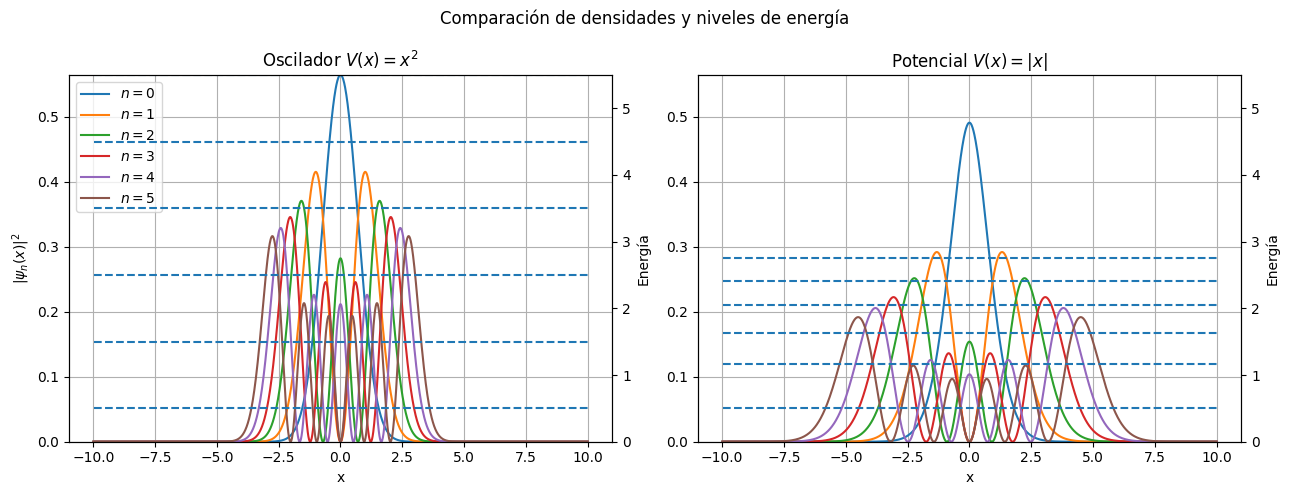

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Leer oscilador
# ===============================
with open("data_oscilador", "r") as f:
    first_line_osc = f.readline()

values_osc = first_line_osc.split()
energies_osc = np.array(values_osc[2:], dtype=float)
data_osc = np.loadtxt("data_oscilador")
x_osc = data_osc[:, 0]

# ===============================
# Leer |x|
# ===============================
with open("data_Abs", "r") as f:
    first_line_abs = f.readline()

values_abs = first_line_abs.split()
energies_abs = np.array(values_abs[2:], dtype=float)
data_abs = np.loadtxt("data_Abs")
x_abs = data_abs[:, 0]

# ===============================
# Calcular límites comunes
# ===============================
ymax_wave = max(np.max(data_osc[:,1:7]),
                np.max(data_abs[:,1:7]))

ymax_energy = max(np.max(energies_osc),
                  np.max(energies_abs))

# ===============================
# Crear figura
# ===============================
fig, axes = plt.subplots(1, 2, figsize=(13,5), sharex=True)

# =====================================================
# Oscilador armónico
# =====================================================
ax1 = axes[0]

for i in range(1,7):
    ax1.plot(x_osc, data_osc[:, i], label=f"$n={i-1}$")

ax1.set_xlabel("x")
ax1.set_ylabel(r"$|\psi_n(x)|^2$")
ax1.set_ylim(0, ymax_wave)
ax1.grid()

ax1b = ax1.twinx()

for n, E in enumerate(energies_osc):
    ax1b.hlines(E, xmin=x_osc.min(), xmax=x_osc.max(),
                linestyles="dashed")

ax1b.set_ylim(0, ymax_energy)
ax1b.set_ylabel("Energía")

ax1.set_title(r"Oscilador $V(x)=x^2$")
ax1.legend(loc="upper left")

# =====================================================
# Potencial |x|
# =====================================================
ax2 = axes[1]

for i in range(1,7):
    ax2.plot(x_abs, data_abs[:, i], label=f"$n={i-1}$")

ax2.set_xlabel("x")
ax2.set_ylim(0, ymax_wave)
ax2.grid()

ax2b = ax2.twinx()

for n, E in enumerate(energies_abs):
    ax2b.hlines(E, xmin=x_abs.min(), xmax=x_abs.max(),
                linestyles="dashed")

ax2b.set_ylim(0, ymax_energy)
ax2b.set_ylabel("Energía")

ax2.set_title(r"Potencial $V(x)=|x|$")

plt.suptitle("Comparación de densidades y niveles de energía")
plt.tight_layout()
plt.show()

In [7]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# -------- Leer oscilador --------
with open("data_oscilador", "r") as f:
    first_line_osc = f.readline()

values_osc = first_line_osc.split()
energies_osc = np.array(values_osc[2:], dtype=float)

data_osc = np.loadtxt("data_oscilador")
x_osc = data_osc[:, 0]

# -------- Leer potencial |x| --------
with open("data_Abs", "r") as f:
    first_line_abs = f.readline()

values_abs = first_line_abs.split()
energies_abs = np.array(values_abs[2:], dtype=float)

data_abs = np.loadtxt("data_Abs")
x_abs = data_abs[:, 0]

# -------- Límites globales (fijos) --------
ymax_wave = max(np.max(data_osc[:,1:]),
                np.max(data_abs[:,1:]))

ymax_energy = max(np.max(energies_osc),
                  np.max(energies_abs))

xmin = min(x_osc.min(), x_abs.min())
xmax = max(x_osc.max(), x_abs.max())

# -------- Función interactiva --------
def compare_potentials(n):
    
    fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True)
    
    # ===============================
    # Oscilador armónico
    # ===============================
    ax1 = axes[0]
    ax1.plot(x_osc, data_osc[:, n+1])
    ax1.set_title("Oscilador $V(x)=x^2$")
    ax1.set_xlabel("x")
    ax1.set_ylabel(r"$|\psi_n(x)|^2$")
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(0, ymax_wave)
    ax1.grid()
    
    ax1b = ax1.twinx()
    E_osc = energies_osc[n]
    ax1b.hlines(E_osc, xmin=xmin, xmax=xmax,
                linestyles="dashed")
    ax1b.set_ylim(0, ymax_energy)
    ax1b.set_ylabel("Energía")
    
    
    # ===============================
    # Potencial |x|
    # ===============================
    ax2 = axes[1]
    ax2.plot(x_abs, data_abs[:, n+1])
    ax2.set_title("Potencial $V(x)=|x|$")
    ax2.set_xlabel("x")
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(0, ymax_wave)
    ax2.grid()
    
    ax2b = ax2.twinx()
    E_abs = energies_abs[n]
    ax2b.hlines(E_abs, xmin=xmin, xmax=xmax,
                linestyles="dashed")
    ax2b.set_ylim(0, ymax_energy)
    ax2b.set_ylabel("Energía")
    
    plt.suptitle(f"Comparación para n = {n}")
    plt.tight_layout()
    plt.show()

# -------- Slider --------
interact(compare_potentials, 
         n=(0, min(len(energies_osc), len(energies_abs))-1));

interactive(children=(IntSlider(value=2, description='n', max=5), Output()), _dom_classes=('widget-interact',)…